In [1]:
from utils import make_uniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Assume that there are $N=100$ bears in a population and we observe 23 on a 10 day obersvation and 19 on a second day observation. But, 4 of those 19 are from the original 23 day sample.

How do we estimate the population $N$?

In [2]:
from scipy.stats import hypergeom
qs = np.arange(50, 501)
prior_N = make_uniform(qs, name='N')
prior_N.shape

Ns = prior_N.qs
K = 23
n = 19
k = 4

likelihood = hypergeom(Ns, K, n).pmf(k)

In [3]:
posterior = prior_N * likelihood
posterior.normalize()

0.07755224277106727

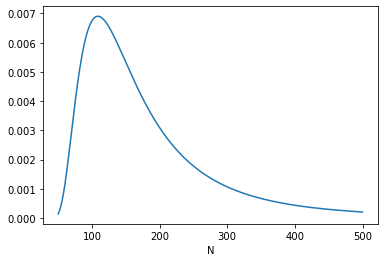

In [4]:
posterior.plot()
plt.show()

In [5]:
posterior.max_prob()

109

#### Two parameter model

Account for the probability that a bear is seen $p$.

In [6]:
K = 23
n = 19
k = 4

k10 = 23 - 4 # Bears seen in the first round and not the second
k01 = 19 - 4 # Bears seen in the second round and no the first
k11 = 4 # Bears seen in both

N = 100

observed = k01 + k10 + k11
k00 = N - observed # Number of bears not seen

In [7]:
x = [k00, k01, k10, k11]

# Assuming that all bears have the same probability of observation
p = 0.2 # Probability of see bear
q = 1-p # Probability of not seeing beear
y = [q*q, q*p, p*q, p*p]

In [9]:
from scipy.stats import multinomial

likelihood = multinomial.pmf(x, N, y)
likelihood # Liklihood if we know both N and p

0.0016664011988507257

In [10]:
from utils import make_joint
# Now we can place a prior over N and p
qs = np.linspace(0, 0.99, num=100)
prior_p = make_uniform(qs, name='p')

joint_prior = make_joint(prior_p, prior_N)
joint_prior.shape

(451, 100)

In [13]:
# Easier to work with a 1d array for this case with a multi index
from empiricaldist import Pmf

joint_prior_pmf = Pmf(joint_prior.stack())
joint_prior_pmf.head(3)

50  0.00    0.000022
    0.01    0.000022
    0.02    0.000022
Name: , dtype: float64

In [15]:
likelihood = joint_prior_pmf.copy() # Not going to use the actual values, but need index and structure

observed = k01 + k10 + k11

for N, p in joint_prior_pmf.index:
    k00 = N - observed
    x = [k00, k01, k10, k11]
    q = 1-p
    y = [q*q, q*p, p*q, p*p]
    likelihood[N, p] = multinomial.pmf(x, N, y)


In [17]:
posterior_pmf = joint_prior_pmf * likelihood
posterior_pmf.normalize()

2.9678796190279657e-05

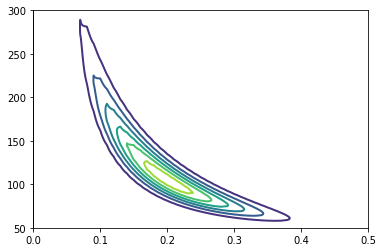

In [25]:
poster_pmf_ary = posterior_pmf.unstack()
plt.contour(poster_pmf_ary.columns, poster_pmf_ary.index, poster_pmf_ary, linewidths = 2)
plt.xlim(0,0.5)
plt.ylim(50,300)
plt.show()